# Edge Detection

## Edge detection using gradients
An edge is a place of rapid change in the image intensity 
function.

### Partial derivatives of an image
for 2D function $f(x, y)$, the partial derivative w.r.t. $x$ is
$$
\frac{\partial f(x, y)}{\partial x}=\lim _{\varepsilon \rightarrow 0} \frac{f(x+\varepsilon, y)-f(x, y)}{\varepsilon}
$$
For **discrete data**, we can approximate using finite differences:
$$
\frac{\partial f(x, y)}{\partial x}=\frac{f(x+1, y)-f(x, y)}{1}
$$

### Gradient
$\bigtriangledown f =  (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$, pronounced as **Del**

<img src='../images/gradient.jpg'>

## Laplacian($\bigtriangledown^{2}$) as edge detector
<img src='../images/laplacian.jpg'>

$$\bigtriangledown^{2} f = \frac{\partial^{2} f}{\partial x^{2}}+\frac{\partial^{2} f}{\partial y^{2}}$$

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io as io_url
import importlib

import mysubplot
importlib.reload(mysubplot)

from canny import non_max_suppression, double_threshold, hysteresis,sobel_filter,canny_detector

In [5]:
frame = io_url.imread('../images/lena.jpg', as_gray=True)

k = 3 # Kernel size
# Apply Gaussian filter to cancel the noise first
frame = cv2.GaussianBlur(frame,(5,5), sigmaX=1, sigmaY=1)
sobel_x = cv2.Sobel(frame,-1,1,0,ksize=k)
sobel_y = cv2.Sobel(frame,-1,0,1,ksize=k)
magnitude, angle = sobel_filter(frame)

laplacian = cv2.Laplacian(frame,-1,ksize=k)
data = 255*magnitude/magnitude.max()
data = data.astype(np.uint8)
ret,th = cv2.threshold(data.astype(np.uint8),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

Here is a fancy way to subplot

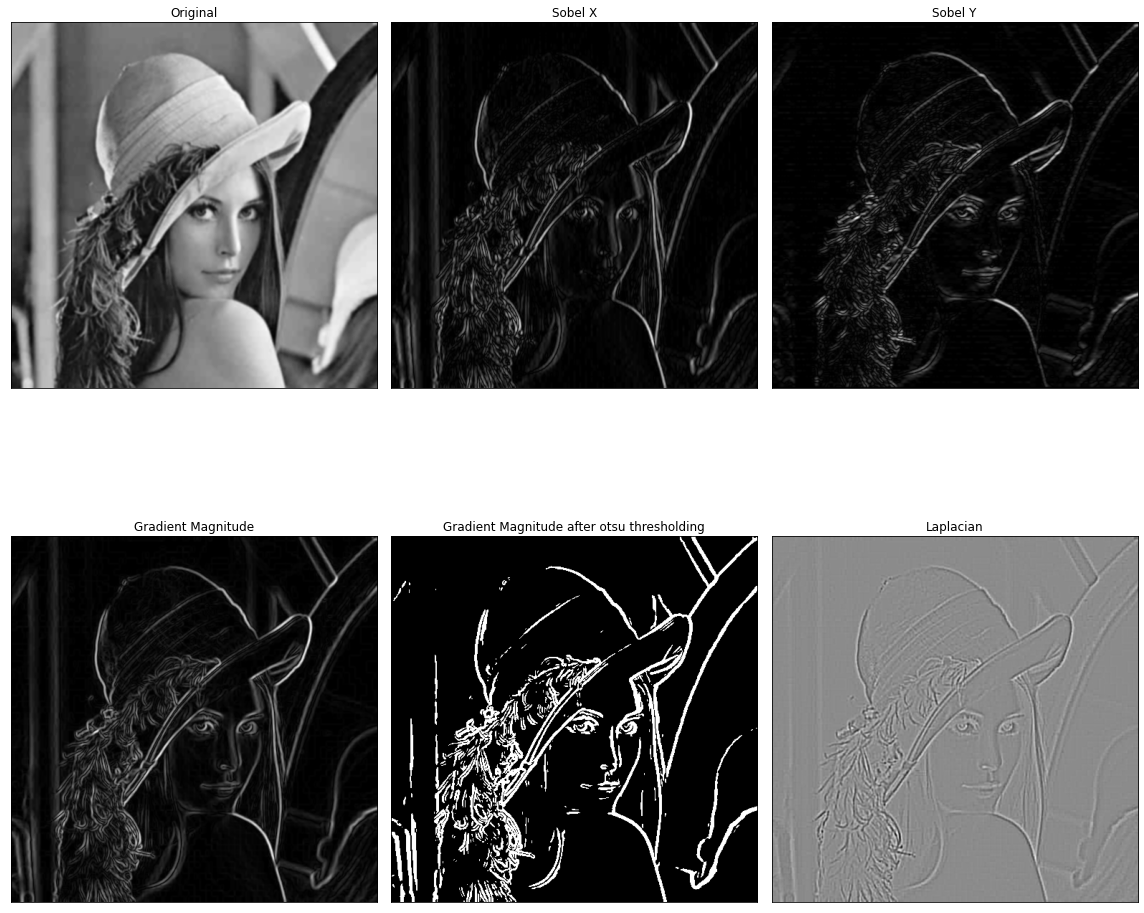

Hmm, nice plots!


In [6]:
# (fig, axs) = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
# axs = axs.ravel() # flaten 2D array

# # plot each of the images
# axs[0].imshow(frame, cmap="gray")
# axs[1].imshow(np.abs(sobel_x)/np.abs(sobel_x).max(), cmap='gray');
# axs[2].imshow(np.abs(sobel_y)/np.abs(sobel_y).max(), cmap='gray');
# axs[3].imshow(magnitude/magnitude.max(), cmap='gray');
# axs[4].imshow(th, cmap='gray');
# axs[5].imshow(laplacian, cmap='gray');

# # set the titles of each subplot
# axs[0].set_title('Original');
# axs[1].set_title('Sobel X');
# axs[2].set_title('Sobel Y');
# axs[3].set_title('Gradient Magnitude');
# axs[4].set_title('Gradient Magnitude after otsu thresholding');
# axs[5].set_title('Laplacian');

# # loop over each subplot axs and turn off x and y ticks
# for i in range(0,6):
#     axs[i].set_xticks([]); axs[i].set_yticks([]);

# plt.tight_layout()
# plt.show()
fig = plt.subplots(nrows=2, ncols=3, figsize=(16, 16))
titles = ['Original','Sobel X','Sobel Y','Gradient Magnitude','Gradient Magnitude after otsu thresholding','Laplacian']
images = [frame, np.abs(sobel_x)/np.abs(sobel_x).max(), np.abs(sobel_y)/np.abs(sobel_y).max(), magnitude, th, laplacian]
mysubplot.subplots(images, titles, 2, 3)

### Threshold after gradient operations
The otsu thresholoding and other thresholding approaches could see this page 

### Gradient Operators
<img src='../images/operator.jpg'>
Kernel size affects localization and noise sensitive.

### Derivative of Gaussian (DoG)
#### image corrupted by additive Gaussian noise
<img src='../images/DoG_noise.jpg'>

#### Smooth by gaussian filter
<img src='../images/DoG.png'>
Take derivatives of Gaussian filtered image = apply DoG to image directly

#### Gaussian vs DoG
Gaussian:
- remove “high-frequency” components;  “low-pass” filter
- Can the weights' values of a smoothing filter be negative? No
- The values sum to **One**: constant regions are not affected by the filter

DoG:
- Can the values of a derivative filter be negative?
- Can the weights' values of a smoothing filter be negative? Yes
- The values sum to **Zero**: no response in constant regions

## Canny Edge Detector
A step-by-step [link](https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123)
- Noise reduction using Gaussian filter
- Gradient calculation
- Non-maximum suppression: thin the edges
- Double threshold: weak, strong and uncertain positions
- Edge Tracking by Hysteresis: are uncertain connnected with strong positions?

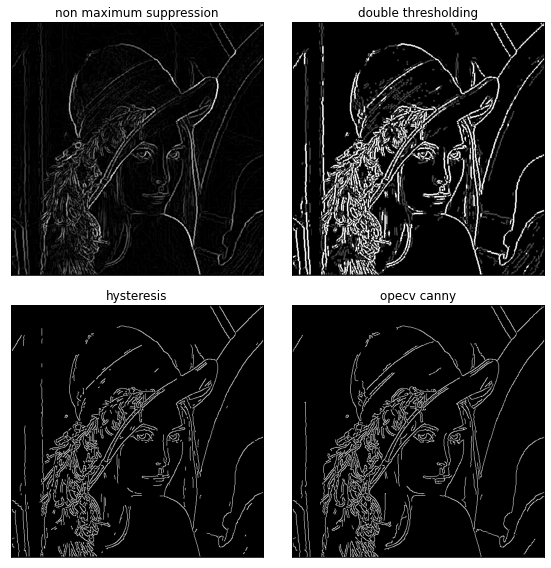

In [5]:
mag_thin = non_max_suppression(magnitude, angle)
t = 0.08

mag_th = double_threshold(mag_thin, t, 2*t)
res = canny_detector(frame, t, 2*t)

frame = 255*frame/frame.max()
edges = cv2.Canny(frame.astype('uint8'),60,120)

fig = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
titles = ['non maximum suppression','double thresholding', 'hysteresis', 'opecv canny']
images = [mag_thin, mag_th, res, edges]
mysubplot(images, titles, 2, 2)


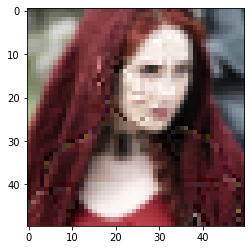

In [19]:
img = io_url.imread('filtering_files/hybrid.png')
plt.imshow(img)
img1 = cv2.resize(img, (50,50),interpolation= cv2.INTER_LINEAR)
plt.imshow(img1)

In [1]:
import sys

In [2]:
sys.path

['d:\\PhD\\Code\\image-cv\\cmu_cv\\notebooks',
 'D:\\PhD\\Code\\image-cv\\myfunction',
 'd:\\PhD\\Code\\image-cv\\cmu_cv\\notebooks',
 'C:\\Users\\Steve\\AppData\\Local\\Programs\\Python\\Python38-32\\python38.zip',
 'C:\\Users\\Steve\\AppData\\Local\\Programs\\Python\\Python38-32\\DLLs',
 'C:\\Users\\Steve\\AppData\\Local\\Programs\\Python\\Python38-32\\lib',
 'C:\\Users\\Steve\\AppData\\Local\\Programs\\Python\\Python38-32',
 'd:\\PhD\\Code\\image-cv\\cmu_cv\\.cmuvenv',
 '',
 'd:\\PhD\\Code\\image-cv\\cmu_cv\\.cmuvenv\\lib\\site-packages',
 'd:\\PhD\\Code\\image-cv\\cmu_cv\\.cmuvenv\\lib\\site-packages\\win32',
 'd:\\PhD\\Code\\image-cv\\cmu_cv\\.cmuvenv\\lib\\site-packages\\win32\\lib',
 'd:\\PhD\\Code\\image-cv\\cmu_cv\\.cmuvenv\\lib\\site-packages\\Pythonwin']